In [6]:
import numpy as np
import pandas as pd
import warnings
from typing import List, Tuple, Dict


def split_data(X, y, test_size=0.1, seed=None):
    # shuffle data
    np.random.seed(seed)
    perm = np.random.permutation(X.index)
    X = X.loc[perm]
    y = y.loc[perm]
    
    # split into training and test sets
    n_samples = X.shape[0]
    if isinstance(test_size, float):
        if test_size <= 0 or test_size >= 1:
            raise ValueError("The test size should fall in the range (0,1)")
        n_train = n_samples - round(test_size*n_samples)
    elif isinstance(test_size, int):
        n_train = n_samples - test_size
    else:
        raise ValueError("Improper type \'%s\' for test_size" % type(test_size))

    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]

    return X_train, X_test, y_train, y_test

def encode_one_hot(data): # note: pd.get_dummies(df) does the same
    # https://www.kite.com/python/answers/how-to-do-one-hot-encoding-with-numpy-in-python
    one_hot = np.zeros((data.size, data.max()+1))
    rows = np.arange(data.size)
    one_hot[rows, data] = 1
    return one_hot


def confusion_matrix(y_actual, y_pred):
    """ Returns a confusion matrix where the rows are the actual classes, and the columns are the predicted classes"""
    if y_actual.shape != y_pred.shape:
        raise ValueError ("input arrays must have the same shape, {}!={}".format(y_actual.shape, y_pred.shape))
    n = max(max(y_actual), max(y_pred)) + 1
    C = np.zeros((n, n), dtype=int)
    for label_actual in range(n):
        idxs_true = (y_actual == label_actual)
        for label_pred in range(n):
            C[label_actual, label_pred] = sum(y_pred[idxs_true] == label_pred)
    return C

def calc_f1_score(y_actual, y_pred) -> Tuple[float]:
    C = confusion_matrix(y_actual, y_pred)
    if C.shape[0] != 2:
        raise ValueError ("input arrays must only have binary values")
    recall    = C[1][1]/(C[1][0]+C[1][1]) #true positive/actual positive
    precision = C[1][1]/(C[0][1]+C[1][1]) #true positive/predicted positive
    if (recall == 0) or (precision == 0):
        f1 = 0
    else:
        f1 = 2 * recall*precision/(recall + precision) # = 2/((1/recall)+(1/precision))

    print("Recall: {:.4f}".format(recall))
    print("Precision: {:.4f}".format(precision))
    print("F1 Score: {:.4f}".format(f1))


In [7]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
import numpy as np
import pickle

class LogisticRegression:
    """Logistic regression model."""
    def __init__(self, learning_rate=0.01, num_iterations=10000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
    
    def add_intercept(self, X):
        """Add intercept to data."""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        """Compute the sigmoid function of the input."""
        return 1 / (1 + np.exp(-z))

    def loss(self, y, h):
        """Compute the binary cross-entropy loss."""
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        """Fit logistic regression model to data."""
        if self.fit_intercept:
            X = self.add_intercept(X)

        # Initialize model parameters
        self.theta = np.zeros(X.shape[1])

        # Perform gradient descent
        for i in range(self.num_iterations):
            # Compute predicted probabilities
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)

            # Compute gradients
            gradient = np.dot(X.T, (h - y)) / y.size

            # Update model parameters
            self.theta -= self.learning_rate * gradient

            # Print loss every 1000 iterations
            if i % 1000 == 0:
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                loss = self.loss(y, h)
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X):
        """Make predictions using logistic regression model."""
        if self.fit_intercept:
            X = self.add_intercept(X)

        # Compute predicted probabilities
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)

        # Return binary predictions
        return (h > 0.5).astype(int)

    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def save(self, filename):
        """Save trained model parameters to a pickle file."""
        with open(filename, 'wb') as f:
            pickle.dump(self.theta, f)

    @classmethod
    def load(cls, filename):
        """Load trained model parameters from a pickle file."""
        model = cls()
        with open(filename, 'rb') as f:
            model.theta = pickle.load(f)
        return model


In [11]:
df1=pd.read_csv('C:/Users/HP/OneDrive/Desktop/deploy/fall detection1')
df1.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/HP/OneDrive/Desktop/deploy/fall detection1'

In [ ]:
#Adding new feature 'Index'
df1 = df1.reset_index(drop=True)
df1['index']=df1.index

In [ ]:
df2=pd.read_csv('/content/fall detection2.csv')
df2.head()

,ACTIVITY,EEG,BP,HR,CIRCLUATION
0,3,-1600.00,13,79,317
1,2,-1146.08,20,54,165
2,2,-1263.38,46,67,224
3,4,-2848.93,26,138,?
4,4,-2381.15,85,120,809


In [ ]:
#Adding new feature 'Index'
df2 = df2.reset_index(drop=True)
df2['index']=df2.index

In [ ]:
df1.shape,df2.shape

((16382, 4), (16382, 6))

In [ ]:
df2.drop(['ACTIVITY'],axis=1,inplace=True)

In [ ]:
df = pd.merge(df1, df2, left_index=True,right_index=True)

In [ ]:
df.drop(['index_x'],axis=1,inplace=True)
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,index_y
0,3,4722.92,4019.64,-1600.00,13,79,317,0
1,2,4059.12,2191.03,-1146.08,20,54,165,1
2,2,4773.56,2787.99,-1263.38,46,67,224,2
3,4,8271.27,9545.98,-2848.93,26,138,?,3
4,4,7102.16,14148.80,-2381.15,85,120,809,4


In [ ]:
df.drop(['index_y'],axis=1,inplace=True)
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,?
4,4,7102.16,14148.80,-2381.15,85,120,809


In [ ]:
df.shape

(16382, 7)

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64


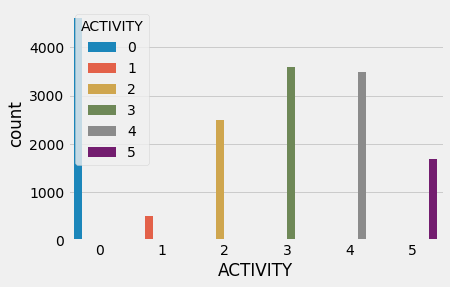

In [ ]:
# TARGET DISTRIBUTION PLOT
print(df['ACTIVITY'].value_counts()) 
plt.style.use('fivethirtyeight')
ax = sns.countplot(x=df.ACTIVITY, data=df, hue=df.ACTIVITY)

In [ ]:
df.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [ ]:
#Treating missing value'?'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

CIRCLUATION 200


In [ ]:
drop_Idx = set(df[(df['CIRCLUATION'] == '?')].index)
drop_Idx = drop_Idx.union(set(df['CIRCLUATION'][df['CIRCLUATION'] == '?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [ ]:
#Treating missing value'?'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

CIRCLUATION 0


In [ ]:
df.shape

(16182, 7)

In [ ]:
#Converting categorical into numerical
df['CIRCLUATION']=df['CIRCLUATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 16381
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     16182 non-null  int64  
 1   TIME         16182 non-null  float64
 2   SL           16182 non-null  float64
 3   EEG          16182 non-null  float64
 4   BP           16182 non-null  int64  
 5   HR           16182 non-null  int64  
 6   CIRCLUATION  16182 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1011.4 KB


<Axes: >

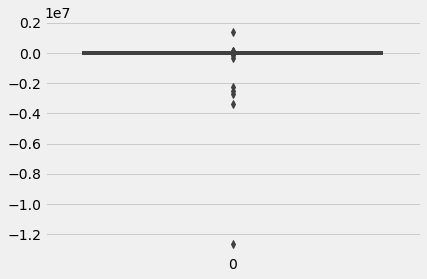

In [ ]:
#Outliers treatment
import seaborn as sns
sns.boxplot(df['EEG'])

In [ ]:

#Removing outliers above and below percentiles
Q1 = df['EEG'].quantile(0.25)
Q3 = df['EEG'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['EEG']=np.where(df['EEG']>upper_whisker,upper_whisker,np.where(df['EEG']<lower_whisker,lower_whisker,df['EEG']))
print(lower_whisker,lower_whisker)

-10837.59125 -10837.59125


<Axes: >

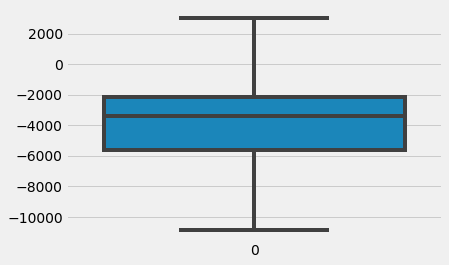

In [ ]:
sns.boxplot(df['EEG'])

In [ ]:
df.head()


,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
4,4,7102.16,14148.80,-2381.15,85,120,809
5,5,7015.24,7336.79,-1699.80,22,95,427


In [ ]:
X=df.drop(['ACTIVITY'],axis=1)
y=df.ACTIVITY

In [ ]:
X


,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165
2,4773.56,2787.99,-1263.38,46,67,224
4,7102.16,14148.80,-2381.15,85,120,809
5,7015.24,7336.79,-1699.80,22,95,427
...,...,...,...,...,...,...
16377,9280.68,11417.00,-3021.64,36,156,654
16378,8479.69,9455.54,-2932.85,17,138,554
16379,8872.53,27449.90,-2870.00,33,156,1364
16380,7738.99,26466.40,-2920.24,97,156,1521


In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit the scaler to your training data
scaler.fit(X)

StandardScaler()

In [ ]:
# Transform your training data
X_train= scaler.transform(X)

In [ ]:
X_test= scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12946, 6), (12946,), (3236, 6), (3236,))

In [ ]:
# Fit logistic regression model to data
model = LogisticRegression(num_iterations=1000, learning_rate=0.1, fit_intercept=True)


# train the model on the training data
model.fit(X_train, y_train)


# evaluate the performance of the model on the test data
acc_test = model.score(X_test, y_test)
acc_train = model.score(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

<ipython-input-4-9110bc555494>:22: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


Iteration 0, Loss: nan


In [ ]:
print("Logistic Regression model")
print("train accuracy: %.2f%%" % (acc_train*1000))
print("test accuracy:  %.2f%%" % (acc_test*1000))

Logistic Regression model
train accuracy: 30.51%
test accuracy:  30.59%


In [ ]:
# Save trained model parameters to a pickle file
#lr.save('model.pkl')

In [ ]:
# Reshape the input data and standardize it
input_data = ( 8223.68,9520.05,-2824.87,99,130,490)
input_data_reshaped = np.asarray(input_data).reshape(1,-1)
std_data =scaler.transform(input_data_reshaped)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Train a logistic regression model and save its parameters to a pickle file
model = LogisticRegression()
model.fit(X_train, y_train)
with open('model.pkl', 'wb') as f:
    pickle.dump(model.theta, f)

# Load the trained model from the pickle file
model = LogisticRegression.load('model.pkl')

# Use the loaded model to make predictions
y_pred = model.predict(std_data)


Iteration 0, Loss: nan


<ipython-input-4-9110bc555494>:22: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


Iteration 1000, Loss: nan
Iteration 2000, Loss: nan
Iteration 3000, Loss: nan
Iteration 4000, Loss: nan
Iteration 5000, Loss: nan
Iteration 6000, Loss: nan
Iteration 7000, Loss: nan
Iteration 8000, Loss: nan
Iteration 9000, Loss: nan


<ipython-input-4-9110bc555494>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
# Make predictions using the trained logistic regression model
prediction = model.predict(std_data)
print(prediction)

[0]


<ipython-input-4-9110bc555494>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
